# Домашнее задание №2. Создание признакового пространства.

In [226]:
import pandas as pd
import numpy as np
from sklearn.metrics import *
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from string import punctuation
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer

from collections import Counter
from sklearn.metrics import f1_score
from sklearn import model_selection, preprocessing, linear_model
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D, Conv1D, GRU, LSTM, Dropout
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\BazhanovaEN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Задание:
### Задание 1.

**Задание**: обучите три классификатора: 

1) на токенах с высокой частотой 

2) на токенах со средней частотой 

3) на токенах с низкой частотой


Сравните полученные результаты, оцените какие токены наиболее важные для классификации.


### Задание 2.

найти фичи с наибольшей значимостью, и вывести их


### Задание 3.

1) сравнить count/tf-idf/hashing векторайзеры/полносвязанную сетку (построить classification_report)

2) подобрать оптимальный размер для hashing векторайзера 

3) убедиться что для сетки нет переобучения

## План решения

[0. Загрузка и просмотр данных](#section_0)

[1. Задание 1](#section_1)

[2. Задание 2](#section_2)

[3. Задание 3](#section_3)

### 0. Загрузка и просмотр данных <a id='section_0'></a>

In [227]:
# считываем данные и заполняем общий датасет
positive = pd.read_csv('positive.csv', sep=';', usecols=[3], names=['text'])
positive['label'] = ['positive'] * len(positive)
negative = pd.read_csv('negative.csv', sep=';', usecols=[3], names=['text'])
negative['label'] = ['negative'] * len(negative)
df = positive.append(negative)

In [228]:
df.head()

,text,label
0,"@first_timee хоть я и школота, но поверь, у на...",positive
1,"Да, все-таки он немного похож на него. Но мой ...",positive
2,RT @KatiaCheh: Ну ты идиотка) я испугалась за ...,positive
3,"RT @digger2912: ""Кто то в углу сидит и погибае...",positive
4,@irina_dyshkant Вот что значит страшилка :D\nН...,positive


In [229]:
#разбиваем данные на train и test
x_train, x_test, y_train, y_test = train_test_split(df.text, df.label)

### 1. Задание 1 <a id='section_1'></a>

In [230]:
#стоп-слова
print(stopwords.words('russian'))

['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его', 'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот', 'от', 'меня', 'еще', 'нет', 'о', 'из', 'ему', 'теперь', 'когда', 'даже', 'ну', 'вдруг', 'ли', 'если', 'уже', 'или', 'ни', 'быть', 'был', 'него', 'до', 'вас', 'нибудь', 'опять', 'уж', 'вам', 'ведь', 'там', 'потом', 'себя', 'ничего', 'ей', 'может', 'они', 'тут', 'где', 'есть', 'надо', 'ней', 'для', 'мы', 'тебя', 'их', 'чем', 'была', 'сам', 'чтоб', 'без', 'будто', 'чего', 'раз', 'тоже', 'себе', 'под', 'будет', 'ж', 'тогда', 'кто', 'этот', 'того', 'потому', 'этого', 'какой', 'совсем', 'ним', 'здесь', 'этом', 'один', 'почти', 'мой', 'тем', 'чтобы', 'нее', 'сейчас', 'были', 'куда', 'зачем', 'всех', 'никогда', 'можно', 'при', 'наконец', 'два', 'об', 'другой', 'хоть', 'после', 'над', 'больше', 'тот', 'через', 'эти', 'нас', 'про', 'всего', 'них', 'какая', 'много', 'разве', 'три', 'эту', 'моя', 'впр

In [231]:
#знаки пунктуации
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [232]:
#шум
noise = stopwords.words('russian') + list(punctuation)
print(noise)

['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его', 'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот', 'от', 'меня', 'еще', 'нет', 'о', 'из', 'ему', 'теперь', 'когда', 'даже', 'ну', 'вдруг', 'ли', 'если', 'уже', 'или', 'ни', 'быть', 'был', 'него', 'до', 'вас', 'нибудь', 'опять', 'уж', 'вам', 'ведь', 'там', 'потом', 'себя', 'ничего', 'ей', 'может', 'они', 'тут', 'где', 'есть', 'надо', 'ней', 'для', 'мы', 'тебя', 'их', 'чем', 'была', 'сам', 'чтоб', 'без', 'будто', 'чего', 'раз', 'тоже', 'себе', 'под', 'будет', 'ж', 'тогда', 'кто', 'этот', 'того', 'потому', 'этого', 'какой', 'совсем', 'ним', 'здесь', 'этом', 'один', 'почти', 'мой', 'тем', 'чтобы', 'нее', 'сейчас', 'были', 'куда', 'зачем', 'всех', 'никогда', 'можно', 'при', 'наконец', 'два', 'об', 'другой', 'хоть', 'после', 'над', 'больше', 'тот', 'через', 'эти', 'нас', 'про', 'всего', 'них', 'какая', 'много', 'разве', 'три', 'эту', 'моя', 'впр

In [233]:
# список токетов (удаляем пунктуацию)
corpus = [token for tweet in df.text for token in word_tokenize(tweet) if token not in punctuation]
print(len(corpus))
corpus[:10]

2870536


['first_timee', 'хоть', 'я', 'и', 'школота', 'но', 'поверь', 'у', 'нас', 'то']

In [234]:
freq_dict = Counter(corpus)
freq_dict_sorted= sorted(freq_dict.items(), key=lambda x: -x[1])
list(freq_dict_sorted)[:10]

[('не', 69472),
 ('и', 55166),
 ('в', 52902),
 ('я', 52818),
 ('RT', 38070),
 ('на', 35759),
 ('http', 32998),
 ('что', 31541),
 ('с', 27217),
 ('а', 26860)]

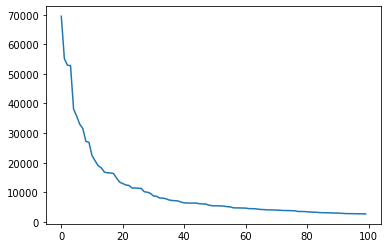

In [235]:
first_100_freqs = [freq for word, freq in freq_dict_sorted[:100]]
plt.plot(first_100_freqs)
plt.show()

**Обучим классификатор на токенах с высокой частотой**

In [236]:
#1. Токены с высокой частотой
tokens_hight = [token[0] for token in freq_dict_sorted[:100]]

vec = TfidfVectorizer(ngram_range=(1, 1), 
                      tokenizer=word_tokenize,
                      vocabulary=tokens_hight)
                     # stop_words=noise без чистки шума метрика лучше
bow = vec.fit_transform(x_train)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

    negative       0.59      0.63      0.61     26033
    positive       0.67      0.62      0.64     30676

    accuracy                           0.63     56709
   macro avg       0.63      0.63      0.63     56709
weighted avg       0.63      0.63      0.63     56709



**Обучим классификатор на токенах со средней частотой**

In [237]:
#2. Токены со средней частотой
tokens_middle = [token[0] for token in freq_dict_sorted[100:300]]
vec = CountVectorizer(ngram_range=(1, 1), 
                      tokenizer=word_tokenize,
                      vocabulary=tokens_middle)
bow = vec.fit_transform(x_train)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

    negative       0.37      0.62      0.47     16659
    positive       0.78      0.56      0.65     40050

    accuracy                           0.58     56709
   macro avg       0.58      0.59      0.56     56709
weighted avg       0.66      0.58      0.60     56709



**Обучим классификатор на токенах с низкой частотой**

In [238]:
#3. Токены с низкой частотой
tokens_low = [token[0] for token in freq_dict_sorted[300:1000]]
vec = CountVectorizer(ngram_range=(1, 1), 
                     tokenizer=word_tokenize,
                      vocabulary=tokens_low)
bow = vec.fit_transform(x_train)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

    negative       0.44      0.67      0.53     18043
    positive       0.80      0.59      0.68     38666

    accuracy                           0.62     56709
   macro avg       0.62      0.63      0.60     56709
weighted avg       0.68      0.62      0.63     56709



**Вывод:** метрика модели на токенах с высокой частотой показывает лучшую метрику. Следовательно, токены с высокой частотой наиболее важны для классификации.

### 2. Задание 2 <a id='section_2'></a>

Обучение без чистки пунктуации

In [239]:
vec = TfidfVectorizer(ngram_range=(1, 1), 
                      tokenizer=word_tokenize)
bow = vec.fit_transform(x_train)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

    negative       1.00      1.00      1.00     27880
    positive       1.00      1.00      1.00     28829

    accuracy                           1.00     56709
   macro avg       1.00      1.00      1.00     56709
weighted avg       1.00      1.00      1.00     56709



Найдем фичи с наибольшей значимостью

In [240]:
feature_names = vec.get_feature_names()
count_feature = Counter(feature_names)
count_feature_sort = sorted(count_feature.items(), key=lambda x: x[1])
list(count_feature_sort)[:10]

[('!', 1),
 ('#', 1),
 ('$', 1),
 ('%', 1),
 ('&', 1),
 ("'", 1),
 ("''", 1),
 ('(', 1),
 (')', 1),
 ('*', 1)]

Посмотрим, как один из супер-значительных токенов справится с классификацией безо всякого машинного обучения:

In [241]:
cool_token = '!'
pred = ['positive' if cool_token in tweet else 'negative' for tweet in x_test]
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

    negative       0.87      0.51      0.64     48356
    positive       0.17      0.58      0.26      8353

    accuracy                           0.52     56709
   macro avg       0.52      0.54      0.45     56709
weighted avg       0.77      0.52      0.58     56709



### 3. Задание 3 <a id='section_3'></a>

**Cравним count/tf-idf/hashing векторайзеры/полносвязанную сетку (построим classification_report)**

CountVectorizer

In [242]:
vec = CountVectorizer(ngram_range=(1, 1), 
                      tokenizer=word_tokenize,
                      stop_words=noise)
bow = vec.fit_transform(x_train)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['``'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

    negative       0.80      0.76      0.78     29207
    positive       0.76      0.79      0.78     27502

    accuracy                           0.78     56709
   macro avg       0.78      0.78      0.78     56709
weighted avg       0.78      0.78      0.78     56709



TfidfVectorizer

In [243]:
vec = TfidfVectorizer(ngram_range=(1, 1), 
                      tokenizer=word_tokenize, 
                      stop_words=noise)
bow = vec.fit_transform(x_train)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['``'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


              precision    recall  f1-score   support

    negative       0.77      0.77      0.77     27966
    positive       0.78      0.78      0.78     28743

    accuracy                           0.77     56709
   macro avg       0.77      0.77      0.77     56709
weighted avg       0.77      0.77      0.77     56709



HashingVectorizer

In [244]:
vec = HashingVectorizer(n_features=100, 
                        tokenizer=word_tokenize, 
                        stop_words=noise)
bow = vec.fit_transform(x_train)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['``'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


              precision    recall  f1-score   support

    negative       0.62      0.59      0.60     29388
    positive       0.58      0.61      0.59     27321

    accuracy                           0.60     56709
   macro avg       0.60      0.60      0.60     56709
weighted avg       0.60      0.60      0.60     56709



Полносвязная сеть FNN

In [245]:
# labelEncode целевую переменную
encoder = preprocessing.LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.fit_transform(y_test)

In [246]:
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
valid_data = tf.data.Dataset.from_tensor_slices((x_test, y_test))

train_data = train_data.batch(16)
valid_data = valid_data.batch(16)

AUTOTUNE = tf.data.AUTOTUNE

train_data = train_data.cache().prefetch(buffer_size=AUTOTUNE)
valid_data = valid_data.cache().prefetch(buffer_size=AUTOTUNE)

In [247]:
vocab_size = 10000
seq_len = 100

def custom_standardization(input_data):
    
    return input_data

from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

vectorize_layer =  TextVectorization(
    standardize=custom_standardization,
    max_tokens=vocab_size,
    output_mode='int',
    output_sequence_length=seq_len)

# Make a text-only dataset (no labels) and call adapt to build the vocabulary.
text_data = train_data.map(lambda x, y: x)
vectorize_layer.adapt(text_data)

In [248]:
embedding_dim=200

model = Sequential([
    vectorize_layer,
    Embedding(vocab_size, embedding_dim),
    Conv1D(200, (3)),
    Conv1D(200, (2)),
    GRU(300),
    #GlobalAveragePooling1D(),
    Dense(100, activation='relu'),
    Dense(1)
])

In [249]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [250]:
model.fit(train_data, validation_data=valid_data, epochs=5)

Epoch 1/5
10633/10633 [==============================] - 1895s 178ms/step - loss: 0.6308 - accuracy: 0.5560 - val_loss: 0.3898 - val_accuracy: 0.7777
Epoch 2/5
10633/10633 [==============================] - 1844s 173ms/step - loss: 0.3802 - accuracy: 0.7764 - val_loss: 0.3727 - val_accuracy: 0.7749
Epoch 3/5
10633/10633 [==============================] - 1812s 170ms/step - loss: 0.3645 - accuracy: 0.7875 - val_loss: 0.3735 - val_accuracy: 0.7695
Epoch 4/5
10633/10633 [==============================] - 1845s 174ms/step - loss: 0.3569 - accuracy: 0.7932 - val_loss: 0.3717 - val_accuracy: 0.7898
Epoch 5/5
10633/10633 [==============================] - 1836s 173ms/step - loss: 0.3603 - accuracy: 0.7938 - val_loss: 0.4493 - val_accuracy: 0.7465


Сравнение метрик accuracy и val_accuracy показывает, что переобучения у модели нет.

**Вывод:** лучшие результаты метрики у CountVectorizer.

**Подберем оптимальный размер для hashing векторайзера**

In [251]:
result = pd.DataFrame(columns=['n_features', 'f1_score'])
    
for i in [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]:
    vec = HashingVectorizer(n_features=i, 
                            tokenizer=word_tokenize, 
                            stop_words=noise)
    bow = vec.fit_transform(x_train)
    clf.fit(bow, y_train)
    pred = clf.predict(vec.transform(x_test))

    f1 = f1_score(y_test, pred)
    result = result.append({'n_features': i, 'f1_score': f1}, ignore_index=True)

result.sort_values(by=['f1_score'], ascending=False)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['``'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['``'] not in stop_words.
  warnings

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['``'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressio

,n_features,f1_score
9,10000.0,0.725889
8,9000.0,0.722123
7,8000.0,0.720352
6,7000.0,0.716716
5,6000.0,0.713113
4,5000.0,0.711610
3,4000.0,0.703335
2,3000.0,0.691553
1,2000.0,0.680055
0,1000.0,0.657766


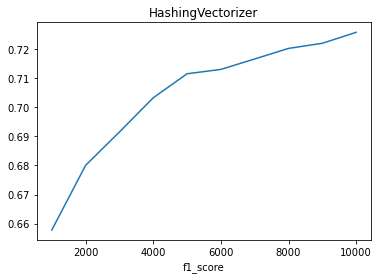

In [252]:
plt.plot(result['n_features'], result['f1_score'])
plt.title('HashingVectorizer')
plt.xlabel("n_features")
plt.xlabel("f1_score")
plt.show()

**Вывод:** Чем больше больше число признаков, тем лучше метрика